# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | chupei
City not found. Skipping...
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | staraya toropa
Processing Record 7 of Set 1 | bonavista
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | dawlatabad
Processing Record 13 of Set 1 | porto nacional
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of

Processing Record 38 of Set 4 | amapa
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | haimen
Processing Record 41 of Set 4 | paamiut
Processing Record 42 of Set 4 | iberia
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | dwarka
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | ulladulla
Processing Record 48 of Set 4 | itarema
Processing Record 49 of Set 4 | poum
Processing Record 0 of Set 5 | puerto madero
Processing Record 1 of Set 5 | vangaindrano
Processing Record 2 of Set 5 | monrovia
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | kumano
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | hovd
Processing Record 8 of Set 5 | ahtopol
Processing Record 9 of Set 5 | ola
Processing Record 10 of Set 5 | codrington
Processing Record 11 of Set 5 | tessalit
Processing Record 12 of Set 5 | atar
P

Processing Record 28 of Set 8 | emirdag
Processing Record 29 of Set 8 | bereda
Processing Record 30 of Set 8 | pyaozerskiy
Processing Record 31 of Set 8 | siocon
Processing Record 32 of Set 8 | gazli
Processing Record 33 of Set 8 | ozinki
Processing Record 34 of Set 8 | mahebourg
Processing Record 35 of Set 8 | gondar
Processing Record 36 of Set 8 | karratha
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | economy
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | andenes
Processing Record 43 of Set 8 | effium
Processing Record 44 of Set 8 | natappian
City not found. Skipping...
Processing Record 45 of Set 8 | belle fourche
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | zharkent
Processing Record 48 of Set 8 | camacari
Processing Record 49 of Set 8 | bathsheba
Processing Record 0 of Set 9 | vestmannaeyjar
Processing Record 1 

Processing Record 19 of Set 12 | limon
Processing Record 20 of Set 12 | camoapa
Processing Record 21 of Set 12 | andahuaylas
Processing Record 22 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 23 of Set 12 | qafsah
City not found. Skipping...
Processing Record 24 of Set 12 | olafsvik
Processing Record 25 of Set 12 | grindavik
Processing Record 26 of Set 12 | srostki
Processing Record 27 of Set 12 | fort collins
Processing Record 28 of Set 12 | rock sound
Processing Record 29 of Set 12 | bethanien
Processing Record 30 of Set 12 | yasnogorsk
Processing Record 31 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 32 of Set 12 | jalu
Processing Record 33 of Set 12 | alberton
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | kulhudhuffushi
Processing Record 36 of Set 12 | burnie
Processing Record 37 of Set 12 | mongu
Processing Record 38 of Set 12 | dibaya
City not found. Skipping...
Processing Record 39 of Set 12 | sitka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:

# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [23]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acapulco,16.86,-99.89,87.80,66,20,5.82,MX,1584646412
1,ushuaia,-54.80,-68.30,51.80,71,75,11.41,AR,1584646215
2,hilo,19.73,-155.09,78.80,65,75,4.70,US,1584646412
3,victoria,22.29,114.16,70.00,88,40,2.24,HK,1584646343
4,staraya toropa,56.28,31.67,35.51,78,0,9.71,RU,1584646412


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

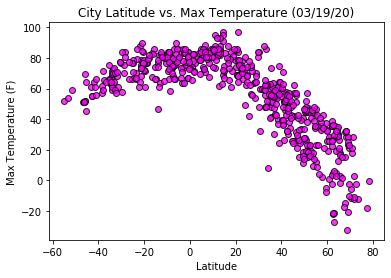

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", color = "magenta", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("C:/Users/PC/Desktop/UT-MIS-DATA-PT-01-2020-U-C-MW/06-Python-APIs/Homework/Instructions/starter_code\Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

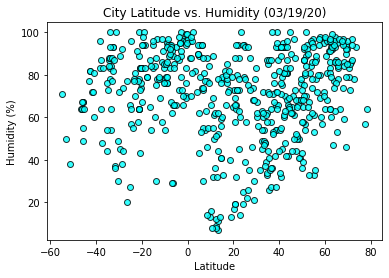

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", color ="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("C:/Users/PC/Desktop/UT-MIS-DATA-PT-01-2020-U-C-MW/06-Python-APIs/Homework/Instructions/starter_code\Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

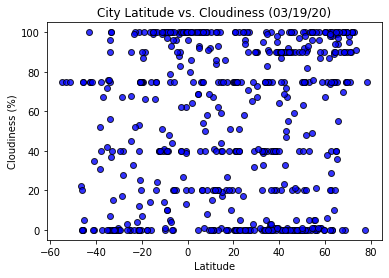

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", color = "blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("C:/Users/PC/Desktop/UT-MIS-DATA-PT-01-2020-U-C-MW/06-Python-APIs/Homework/Instructions/starter_code\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

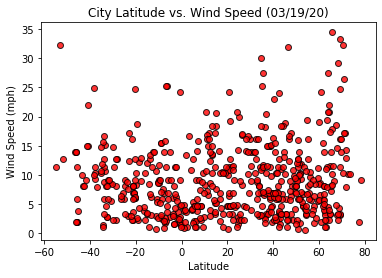

In [27]:

# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", color ="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(False)

# Save the figure
plt.savefig("C:/Users/PC/Desktop/UT-MIS-DATA-PT-01-2020-U-C-MW/06-Python-APIs/Homework/Instructions/starter_code\/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) > 0, :]
southern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -1.21x + 95.3
The r-squared is: -0.8729141281638733
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


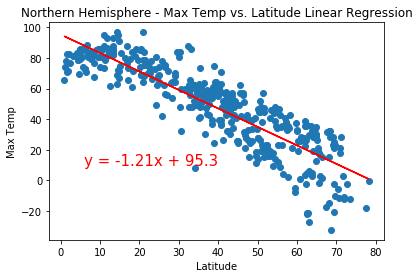

In [33]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.43x + 80.88
The r-squared is: 0.6202706612533329
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


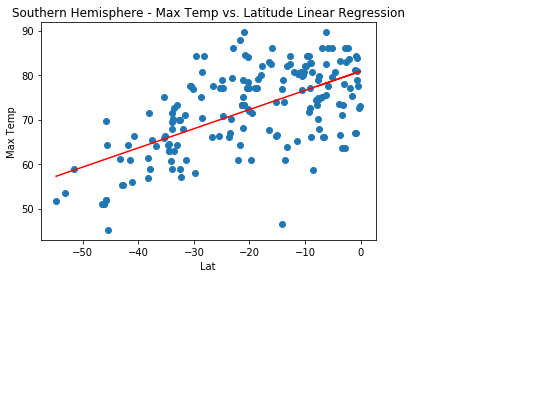

In [35]:
# Create Northern and Southern Hemisphere DataFrames
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.21x + 95.3
The r-squared is: -0.8729141281638733
The regression does not display much of a correlation between the data sets.


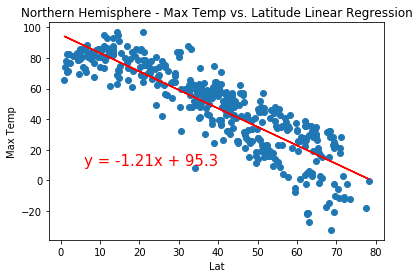

In [44]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 80.88
The r-squared is: 0.6202706612533329
The regression does not display much of a correlation between the data sets.


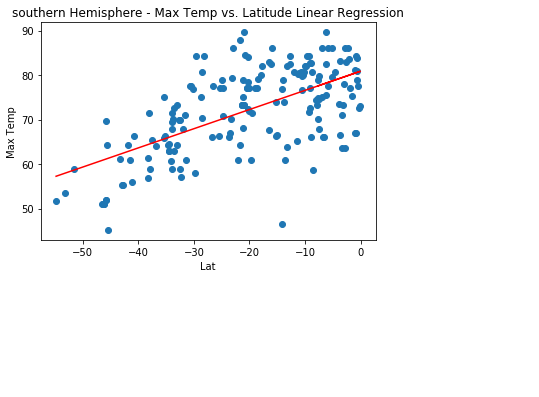

In [46]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 55.28
The r-squared is: 0.3126021235067965
The regression does not display much of a correlation between the data sets.


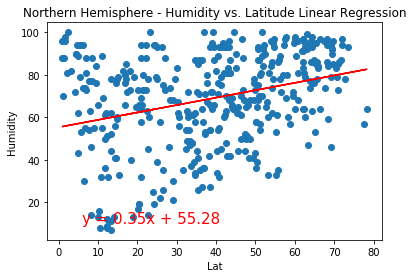

In [48]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 84.63
The r-squared is: 0.3230780901710169
The regression does not display much of a correlation between the data sets.


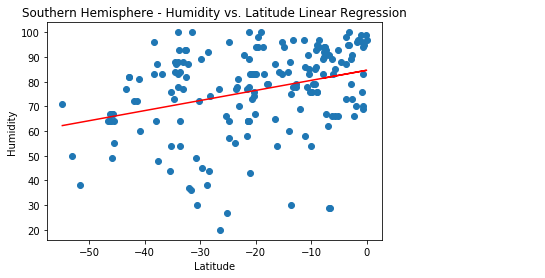

In [49]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 44.77
The r-squared is: 0.1230370450498378
The regression does not display much of a correlation between the data sets.


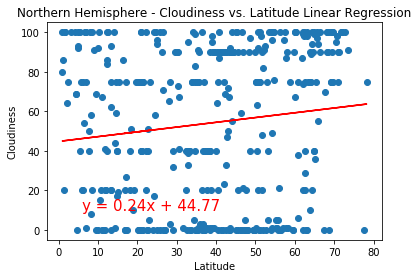

In [50]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.81x + 67.21
The r-squared is: 0.2912541496602961
The regression does not display much of a correlation between the data sets.


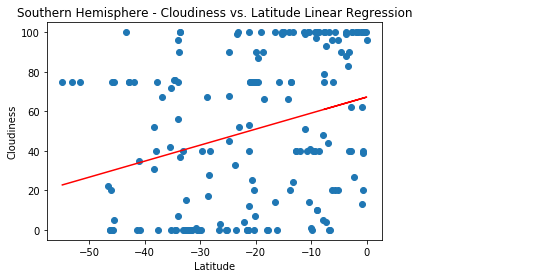

In [51]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 7.48
The r-squared is: 0.13195195557344158
The regression does not display much of a correlation between the data sets.


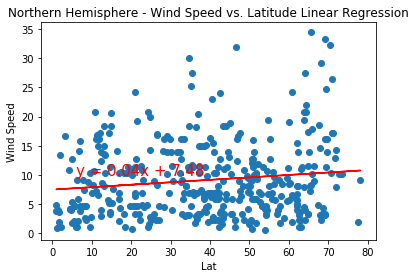

In [56]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 6.15
The r-squared is: -0.25444908551690937
The regression does not display much of a correlation between the data sets.


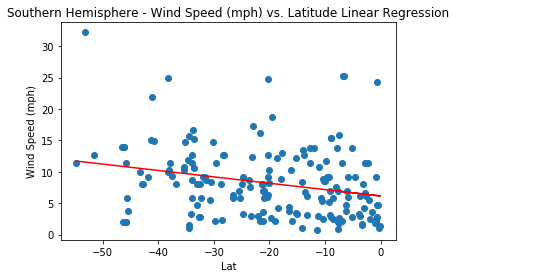

In [58]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()